In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import pyarrow.parquet as pq


In [1]:
stars_path = '/project/jchiang/Run2.2i/truth/stars/'
sne_path = '/project/jchiang/Run2.2i/truth/SNe/'

Before reading the files, check out the schema. See also the [DESC DC2 Data Release Note](https://arxiv.org/abs/2101.04855) for schema info (in appendices).

In [5]:
star_summary_schema = Table.read(stars_path+'truth_star_summary_v1-0-0.parquet', schema_only=True)
star_var_schema = Table.read(stars_path+'truth_star_variability_v1-0-0.parquet', schema_only=True)

In [15]:
print(star_summary_schema.colnames)
print(star_var_schema.colnames)

['id', 'ra', 'dec', 'flux_u', 'flux_g', 'flux_r', 'flux_i', 'flux_z', 'flux_y', 'model', 'max_stdev_delta_mag', 'above_threshold', 'av', 'rv']
['id', 'obsHistID', 'MJD', 'bandpass', 'delta_flux']


In [ ]:
#sn_summary = Table.read(sne_path+'truth_sne_summary_v1-0-0.parquet')
#sn_var = Table.read(sne_path+'truth_star_variability_v1-0-0.parquet')

In [7]:
star_summary = Table.read(stars_path+'truth_star_summary_v1-0-0.parquet')
#star_var = Table.read(stars_path+'truth_star_variability_v1-0-0.parquet')

In [8]:
rrl = np.where(star_summary['model'] == 'applyRRly')

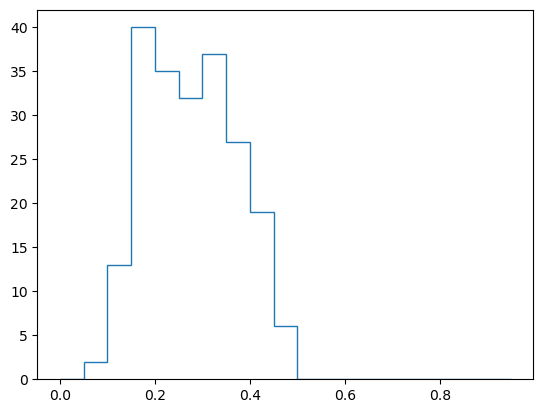

In [9]:
plt.hist(star_summary[rrl]['max_stdev_delta_mag'], bins=np.arange(0, 1, 0.05), histtype='step')
plt.show()

In [18]:
print(len(star_summary[rrl]))

ids = star_summary['id'][rrl]

211


In [17]:
%%time

for i in range(len(star_summary[rrl])):
    if np.mod(i, 20) == 0:
        print(i)
    fp = pq.read_table(
                       source=stars_path+'truth_star_variability_v1-0-0.parquet',
                       use_threads=True,
                       filters=[('id', '=', star_summary['id'][rrl][i])]
                      )
    if i == 0:
        df = fp.to_pandas()
    else:
        df0 = fp.to_pandas()
        df = pd.concat([df, df0])

df.to_csv('dc2_truth_rrlyrae.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
CPU times: user 20min 58s, sys: 14min 3s, total: 35min 1s
Wall time: 15min 28s


In [29]:
pick_id0 = (df['id'] == ids[0]) & (df['bandpass'] == 'g')

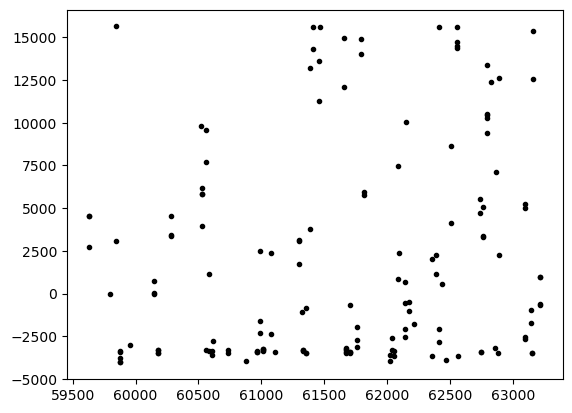

In [30]:
plt.plot(df[pick_id0].MJD, df[pick_id0].delta_flux, 'k.')
plt.show()